$$
\newcommand{\fudm}[2]{\frac{\mathrm{D} #1}{\mathrm{D} #2}}
\newcommand{\pad}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\ppad}[2]{\frac{\partial^2 #1}{\partial #2^2}}
\newcommand{\ppadd}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}
\newcommand{\nnabla}{\nabla^2}
\newcommand{\eps}{\epsilon}
\newcommand{\vdetail}[1]{\vb{#1}=\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\vb}[1]{\mathbf{#1}}
\newcommand{\va}[1]{\vec{#1}}
\newcommand{\tb}[1]{\underline{\underline{\mathbf{#1}}}}
\newcommand{\fud}[2]{\frac{\mathrm{d} #1}{\mathrm{d} #2}}
$$

# 2D linear advection
Here we solve the two dimensional linear advection equation for a scalar field $u(x,y)$

$$\pad{u}{t}+c\pad{u}{x}+c\pad{u}{y}=0$$.

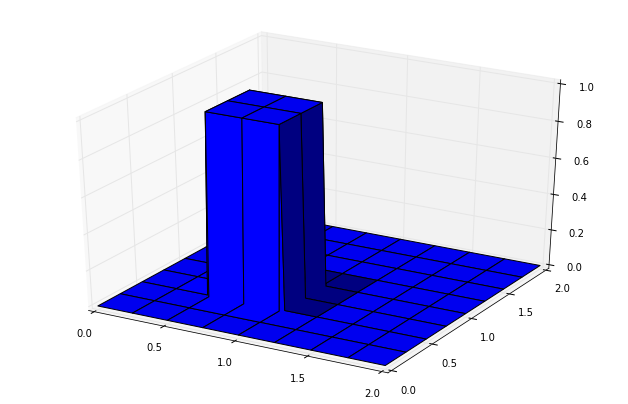

In [22]:
from mpl_toolkits.mplot3d import Axes3D    #New Library required for projected 3d plots

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

nx = 81 #number of elements in x-direction
ny = 81 #number of elements in y-direction
nt = 100 #number of time steps
dt = 0.005 #time step
c = 1. #wave velocity in x and y direction
dx = 2./(nx-1) #meshsize in x-direction
dy = 2./(ny-1) #meshsize in y-direction

x = np.linspace(0.,2.,nx)
y = np.linspace(0.,2.,ny)
X, Y = np.meshgrid(x,y) 

u = np.zeros((ny,nx)) 
un = np.zeros((ny,nx))

#assign initial conditions with a 
#"hat-function": u(.5<=x<=1 && .5<=y<=1 ) is 1
u[int(0.5/dy):int(1./dy+1.),int(0.5/dx):int(1./dx+1.)]=1. 

#plot the initial condition
#the figsize parameter can be used to produce different sized images
fig = plt.figure(figsize=(11,7), dpi=100) 
ax = fig.gca(projection='3d')                      
ax.plot_surface(X,Y,u[:]);

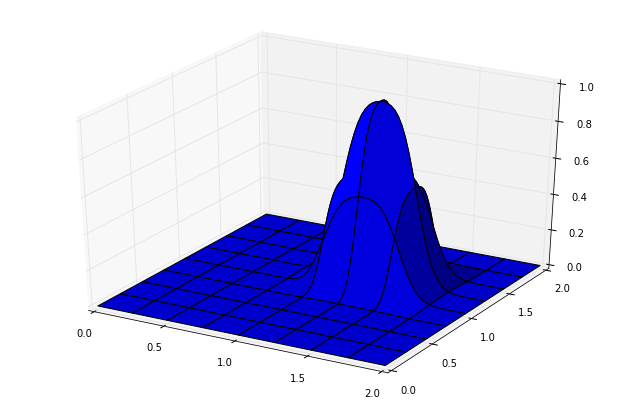

In [25]:
#set up initial conditions
u = np.zeros((ny,nx))
u[int(0.5/dy):int(1./dy+1.),int(0.5/dx):int(1./dx+1.)]=1.

for n in range(nt+1): ##loop across number of time steps
    un = u.copy()
    row, col = u.shape
    u[0,:] = 0.
    u[-1,:] = 0.
    u[:,0] = 0.
    u[:,-1] = 0.
    for j in range(1, row): #x-direction loop
        for i in range(1, col): #y-direction loop
            u[j,i] = un[j, i] - (c*dt/dx*(un[j,i] - un[j,i-1]))-(c*dt/dy*(un[j,i]-un[j-1,i]))

fig = plt.figure(figsize=(11,7), dpi=100); ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,u[:]);

### Speed up using array index notation
Again we use the array index notation to get rid of the slow inner loops. In 2d we have to take care of both dimensions simultaneously. The present example is straight forward, you just need to take care that the size of each term is equal.

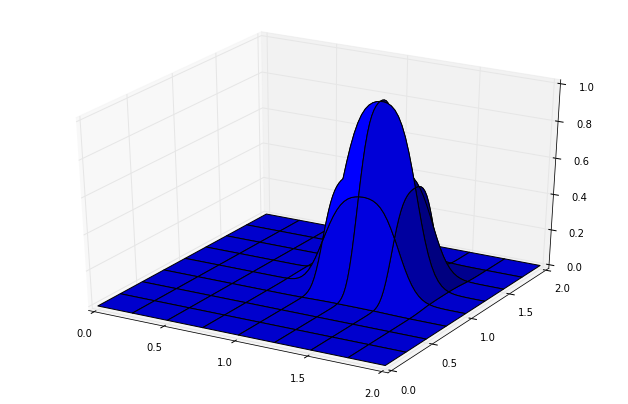

In [26]:
#set up initial conditions
u = np.zeros((ny,nx))
u[int(0.5/dy):int(1./dy+1.),int(0.5/dx):int(1./dx+1.)]=1.

for n in range(nt+1): #loop across number of time steps
    un = u.copy() 
    u[0,:] = 0.
    u[-1,:] = 0.
    u[:,0] = 0.
    u[:,-1] = 0.
    u[1:-1,1:-1]=un[1:-1,1:-1]-(c*dt/dx*(un[1:-1,1:-1]-un[1:-1,0:-2]))-\
        (c*dt/dy*(un[1:-1,1:-1]-un[0:-2,1:-1]))

fig = plt.figure(figsize=(11,7), dpi=100); ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,u[:]);

The program above uses an arbitrary time-step `dt` while we learned in the course that we have fulfill the CFL condition:

$$\sigma=\frac{c\,\Delta t}{(\Delta x,\Delta y)_{min}}\leq 0.5$$

Please implement this condition into above code and run the two variants for a higher grid spacing. Also do some timing using the magic '%%timeit' but remember to comment out the plotting. What amount of speed up can you reach. Then carefully check the code if the boundary conditions are properly set.